In [1]:
# https://www.kaggle.com/code/ltrahul/dna-classifier
import pandas as pd

In [2]:
human_data = pd.read_table('dna_sequence_dataset/human.txt')

In [3]:
chimp = pd.read_table('dna_sequence_dataset/chimpanzee.txt')

In [4]:
dog = pd.read_table('dna_sequence_dataset/dog.txt')

In [5]:
def getKmers(sequence, size=7):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [6]:
%%time
human_data['words']=human_data['sequence'].apply(lambda x: getKmers(x))
human_data

CPU times: user 1.09 s, sys: 92.1 ms, total: 1.18 s
Wall time: 1.18 s


,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ..."
...,...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0,"[atggaag, tggaaga, ggaagat, gaagatt, aagattt, ..."
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6,"[atggggc, tggggca, ggggcac, gggcacc, ggcacct, ..."


In [7]:
human_data_revised=human_data.drop(columns='sequence',axis=1)

In [8]:
human_texts = list(human_data_revised['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [9]:
y=human_data_revised['class'].values
y

array([4, 4, 3, ..., 6, 6, 6])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [14]:
%pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached xgboost-1.7.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [15]:
y_pred=xgb.predict(X_test)
y_pred

array([6, 1, 4, 3, 2, 6, 3, 4, 0, 1, 3, 0, 6, 6, 4, 3, 1, 1, 4, 2, 6, 3,
       0, 6, 6, 5, 0, 6, 6, 0, 1, 6, 1, 5, 6, 3, 3, 4, 4, 1, 2, 6, 5, 6,
       6, 4, 4, 3, 4, 0, 6, 1, 3, 6, 1, 4, 6, 4, 0, 6, 6, 4, 6, 0, 6, 0,
       1, 6, 6, 6, 2, 3, 4, 6, 4, 2, 4, 1, 6, 6, 0, 6, 6, 6, 3, 5, 6, 2,
       6, 4, 1, 3, 6, 1, 6, 6, 6, 0, 4, 6, 6, 3, 0, 2, 6, 6, 4, 2, 6, 0,
       1, 6, 6, 6, 0, 6, 6, 0, 6, 6, 2, 3, 6, 2, 4, 6, 2, 5, 4, 6, 6, 1,
       1, 6, 3, 4, 0, 3, 4, 3, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 3, 1, 3, 5,
       6, 6, 2, 6, 6, 6, 6, 4, 6, 6, 3, 6, 2, 5, 2, 4, 0, 6, 6, 4, 6, 6,
       1, 0, 6, 2, 6, 1, 6, 3, 6, 6, 1, 6, 1, 2, 1, 0, 0, 3, 4, 0, 6, 6,
       6, 3, 6, 5, 6, 6, 3, 4, 6, 3, 4, 4, 6, 6, 0, 6, 1, 1, 6, 5, 6, 3,
       4, 1, 6, 6, 4, 2, 0, 6, 4, 0, 6, 0, 1, 6, 4, 3, 3, 0, 3, 5, 1, 2,
       4, 6, 6, 0, 0, 4, 6, 6, 4, 2, 3, 1, 1, 6, 3, 6, 1, 6, 3, 0, 6, 2,
       1, 2, 1, 6, 5, 6, 4, 6, 1, 2, 4, 6, 6, 6, 6, 0, 4, 6, 1, 4, 6, 3,
       6, 2, 3, 6, 0, 4, 1, 6, 1, 4, 6, 4, 5, 2, 5,

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8835616438356164

In [17]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        99
           1       1.00      0.85      0.92       123
           2       0.98      0.90      0.94        72
           3       0.96      0.86      0.91       127
           4       0.94      0.81      0.87       156
           5       1.00      0.76      0.86        41
           6       0.74      0.98      0.85       258

    accuracy                           0.88       876
   macro avg       0.95      0.86      0.89       876
weighted avg       0.91      0.88      0.89       876



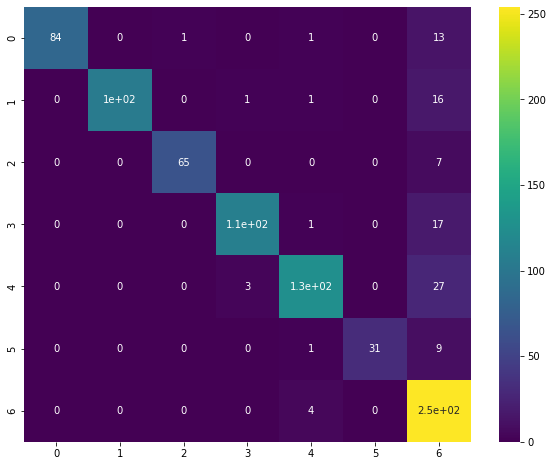

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
plt.show()
